In [9]:
from google.colab import files
uploaded=files.upload()

Saving DataPreprocessing.csv to DataPreprocessing.csv


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
Dataset = pd.read_csv("DataPreprocessing.csv")

# importing an array of features
x = Dataset.iloc[:, :-1].values 
# importing an array of dependent variable
y = Dataset.iloc[:, -1].values

In [12]:
print(x)
print(y)

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 nan]
 ['India' 40.0 69600.0]
 ['Brazil' nan 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [13]:
from sklearn.impute import SimpleImputer
imputa = SimpleImputer(missing_values = np.nan, strategy = 'mean')

imputa.fit(x[:, 1:3])
# Repalcing the missing value using transform method
x[:, 1:3] = imputa.transform(x[:, 1:3])

In [14]:
print(x) 

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 76533.33333333333]
 ['India' 40.0 69600.0]
 ['Brazil' 43.77777777777778 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]


#Handling categorical data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))

In [16]:
print(x)

[[0.0 1.0 0.0 49.0 86400.0]
 [1.0 0.0 0.0 32.0 57600.0]
 [0.0 0.0 1.0 35.0 64800.0]
 [1.0 0.0 0.0 43.0 73200.0]
 [0.0 0.0 1.0 45.0 76533.33333333333]
 [0.0 1.0 0.0 40.0 69600.0]
 [1.0 0.0 0.0 43.77777777777778 62400.0]
 [0.0 1.0 0.0 53.0 94800.0]
 [0.0 0.0 1.0 55.0 99600.0]
 [0.0 1.0 0.0 42.0 80400.0]]


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [18]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

In [20]:
print(x_train)

[[1.0 0.0 0.0 43.77777777777778 62400.0]
 [0.0 0.0 1.0 45.0 76533.33333333333]
 [0.0 1.0 0.0 49.0 86400.0]
 [1.0 0.0 0.0 43.0 73200.0]
 [1.0 0.0 0.0 32.0 57600.0]
 [0.0 1.0 0.0 53.0 94800.0]
 [0.0 0.0 1.0 55.0 99600.0]
 [0.0 1.0 0.0 40.0 69600.0]]


In [21]:
print(x_test)

[[0.0 0.0 1.0 35.0 64800.0]
 [0.0 1.0 0.0 42.0 80400.0]]


In [22]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [23]:
print(y_test)

[0 1]


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 3:] = sc.fit_transform(x_train[:, 3:])
x_test[:, 3:] = sc.fit_transform(x_test[:, 3:])


In [25]:
print(x_train)

[[1.0 0.0 0.0 -0.19159184384578545 -1.078125940841242]
 [0.0 0.0 1.0 -0.014117293757057777 -0.07013167641635393]
 [0.0 1.0 0.0 0.566708506533324 0.6335624327104554]
 [1.0 0.0 0.0 -0.30453019390224867 -0.30786617274297823]
 [1.0 0.0 0.0 -1.9018011447007988 -1.4204636155515815]
 [0.0 1.0 0.0 1.1475343068237058 1.2326533634535495]
 [0.0 0.0 1.0 1.4379472069688968 1.574991038163889]
 [0.0 1.0 0.0 -0.7401495441200351 -0.5646194287757329]]


In [26]:
print(x_test)

[[0.0 0.0 1.0 -1.0 -1.0]
 [0.0 1.0 0.0 1.0 1.0]]


In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

In [29]:
pca.fit(x) 
T = pca.transform(x)

In [30]:
T = pd.DataFrame(T)

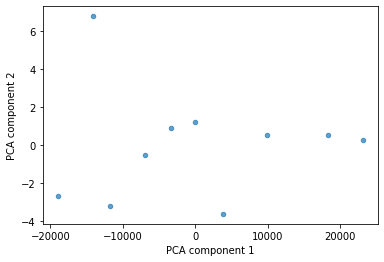

In [31]:
T.columns = ['PCA component 1', 'PCA component 2'] 
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o', alpha=0.7)